In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from collections import Counter

Using TensorFlow backend.


In [2]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)
dft['Product_Category_2']=df['Product_Category_2'].fillna(0)
dft['Product_Category_3']=df['Product_Category_3'].fillna(0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [4]:
ar=itemgetter(1,2,3,5,6)(df.columns)
for i in ar:
    z=0
    for each in dft[i].unique():
        dft.replace({
            i:{each:z}
        },inplace=True)
        z=z+1

In [5]:
ar=itemgetter(1,2,3,5,6)(df.columns)
for i in ar:
    z=0
    for each in df[i].unique():
        df.replace({
            i:{each:z}
        },inplace=True)
        z=z+1
        

In [6]:
maxdr={}
for each in df['Product_Category_1'].unique():
    maxdr[each]=0
for each in dft['Product_Category_1'].unique():
    maxdr[each]=0
for each in range(len(df['Product_Category_1'])):
    if df['Purchase'][each]>maxdr[df['Product_Category_1'][each]]:
        maxdr[df['Product_Category_1'][each]]=df['Purchase'][each]

In [7]:
mindr={}
for each in df['Product_Category_1'].unique():
    mindr[each]=100000000000
for each in dft['Product_Category_1'].unique():
    mindr[each]=100000000000
for each in range(len(df['Product_Category_1'])):
    if df['Purchase'][each]<mindr[df['Product_Category_1'][each]]:
        mindr[df['Product_Category_1'][each]]=df['Purchase'][each]

In [8]:
product_ID_max=[]
product_ID_min=[]
for each in range(len(df['Product_Category_1'])):
    product_ID_max.append(maxdr[df['Product_Category_1'][each]])
for each in range(len(df['Product_Category_1'])):
    product_ID_min.append(mindr[df['Product_Category_1'][each]])

In [9]:
df['Product_Category_1_max']=product_ID_max
df['Product_Category_1_min']=product_ID_min
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370,13717,2638
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200,19708,3790
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422,1778,342
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057,1778,342
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969,10082,1939


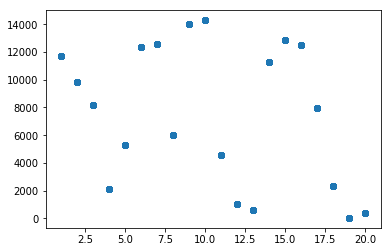

In [10]:
plt.scatter(df['Product_Category_1'],(df['Product_Category_1_max']+df['Product_Category_1_min'])/2)

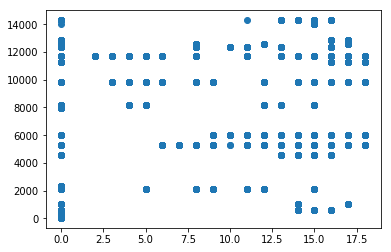

In [11]:
plt.scatter(df['Product_Category_2'],(df['Product_Category_1_max']+df['Product_Category_1_min'])/2)

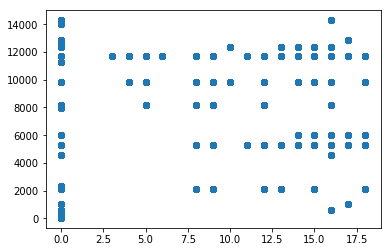

In [12]:
plt.scatter(df['Product_Category_3'],(df['Product_Category_1_max']+df['Product_Category_1_min'])/2)

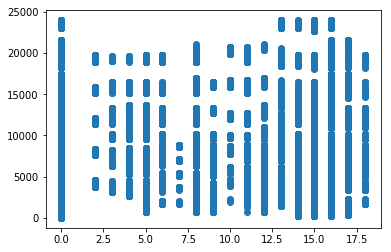

In [14]:
plt.scatter(df['Product_Category_2'],df['Purchase'])

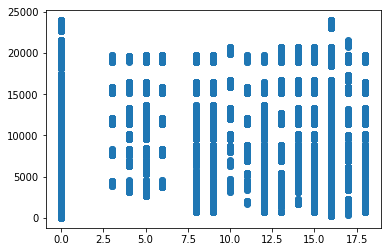

In [15]:
plt.scatter(df['Product_Category_3'],df['Purchase'])

In [63]:
CAT={}
for each in df['Product_Category_1'].unique():
    CAT[each]=[]
for each in CAT:
    for i in range(6):
        CAT[each].append(mindr[each]+((maxdr[each]-mindr[each])/5)*i)

In [64]:
OUR_CAT=[]
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]>=CAT[df['Product_Category_1'][each]][0] and df['Purchase'][each]<CAT[df['Product_Category_1'][each]][1]:
        OUR_CAT.append(0)
    elif df['Purchase'][each]>=CAT[df['Product_Category_1'][each]][1] and df['Purchase'][each]<CAT[df['Product_Category_1'][each]][2]:
        OUR_CAT.append(1)
    elif df['Purchase'][each]>=CAT[df['Product_Category_1'][each]][2] and df['Purchase'][each]<CAT[df['Product_Category_1'][each]][3]:
        OUR_CAT.append(2)
    elif df['Purchase'][each]>=CAT[df['Product_Category_1'][each]][3] and df['Purchase'][each]<CAT[df['Product_Category_1'][each]][4]:
        OUR_CAT.append(3)
    elif df['Purchase'][each]>=CAT[df['Product_Category_1'][each]][4] and df['Purchase'][each]<=CAT[df['Product_Category_1'][each]][5]:
        OUR_CAT.append(4)

In [65]:
df['CATAGORY']=OUR_CAT

In [103]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370,13717,2638,2,9285.4,11501.2
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200,19708,3790,3,13340.8,16524.4
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422,1778,342,3,1203.6,1490.8
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057,1778,342,2,1203.6,1490.8
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969,10082,1939,3,6824.8,8453.4


In [112]:
X=df[['Age','Occupation','City_Category']].values
Y=df['CATAGORY'].values

In [113]:
checker=Counter(Y)
print(checker)

Counter({3: 191716, 2: 143462, 4: 123963, 1: 59315, 0: 31612})


In [114]:
Y = to_categorical(Y, num_classes = 5)
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1)

In [115]:
model=Sequential()
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [116]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [117]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [118]:
epochs = 2
batch_size = 100

In [119]:
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),verbose=1,callbacks=[learning_rate_reduction])

Train on 495061 samples, validate on 55007 samples
Epoch 1/20
495061/495061 [==============================] - 41s 83us/step - loss: 1.4943 - acc: 0.3377 - val_loss: 1.4574 - val_acc: 0.3491
Epoch 2/20
495061/495061 [==============================] - 40s 80us/step - loss: 1.4571 - acc: 0.3475 - val_loss: 1.4541 - val_acc: 0.3491
Epoch 3/20
223500/495061 [============>.................] - ETA: 21s - loss: 1.4552 - acc: 0.3477

KeyboardInterrupt: 

In [28]:
X_tester=dft.drop(['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'],axis=1).values
pred_cat_test=model.predict(X_tester)
pred_cat_train=model.predict(X)
print(pred_cat_train)

[[0.06656988 0.10208333 0.24906729 0.35125306 0.23102644]
 [0.06656988 0.10208333 0.24906729 0.35125306 0.23102644]
 [0.06656988 0.10208333 0.24906729 0.35125306 0.23102644]
 ...
 [0.04102676 0.09957792 0.26922563 0.37353677 0.216633  ]
 [0.05720231 0.08621079 0.22997755 0.3586321  0.2679772 ]
 [0.04421338 0.1021287  0.26855454 0.36639997 0.21870345]]


In [29]:
pred_cat_train=np.argmax(pred_cat_train,axis=1)
pred_cat_test=np.argmax(pred_cat_test,axis=1)

In [30]:
df['CATAGORY']=pred_cat_train
dft['CATAGORY']=pred_cat_test

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370,13717,2638,3
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200,19708,3790,3
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422,1778,342,3
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057,1778,342,3
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969,10082,1939,3


In [32]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,CATAGORY
0,1000004,0,0,0,7,0,0,1,1,0.0,0.0,3
1,1000009,1,0,1,17,1,1,0,3,6.0,14.0,3
2,1000010,2,1,2,1,0,2,1,5,0.0,0.0,3
3,1000010,3,1,2,1,0,2,1,4,14.0,0.0,3
4,1000011,4,1,1,1,1,3,0,4,0.0,0.0,3


In [33]:
checker=Counter(pred_cat_train)
print(checker)

Counter({3: 542193, 2: 7875})


In [34]:
checker=Counter(pred_cat_test)
print(checker)

Counter({3: 232340, 2: 1178, 4: 69, 0: 12})


In [35]:
PRICE_X_test_min=[]
PRICE_X_test_max=[]
for each in range(len(dft['Product_ID'])):
    if pred_cat_test[each]==0:
        PRICE_X_test_min.append(CAT[dft['Product_Category_1'][each]][0])
    elif pred_cat_test[each]==1:
        PRICE_X_test_min.append(CAT[dft['Product_Category_1'][each]][1])
    elif pred_cat_test[each]==2:
        PRICE_X_test_min.append(CAT[dft['Product_Category_1'][each]][2])
    elif pred_cat_test[each]==3:
        PRICE_X_test_min.append(CAT[dft['Product_Category_1'][each]][3])
    elif pred_cat_test[each]==4:
        PRICE_X_test_min.append(CAT[dft['Product_Category_1'][each]][4])
for each in range(len(dft['Product_ID'])):
    if pred_cat_test[each]==0:
        PRICE_X_test_max.append(CAT[dft['Product_Category_1'][each]][1])
    elif pred_cat_test[each]==1:
        PRICE_X_test_max.append(CAT[dft['Product_Category_1'][each]][2])
    elif pred_cat_test[each]==2:
        PRICE_X_test_max.append(CAT[dft['Product_Category_1'][each]][3])
    elif pred_cat_test[each]==3:
        PRICE_X_test_max.append(CAT[dft['Product_Category_1'][each]][4])
    elif pred_cat_test[each]==4:
        PRICE_X_test_max.append(CAT[dft['Product_Category_1'][each]][5])

In [39]:
PRICE_X_train_min=[]
PRICE_X_train_max=[]
for each in range(len(df['Product_ID'])):
    if pred_cat_train[each]==0:
        PRICE_X_train_min.append(CAT[df['Product_Category_1'][each]][0])
    elif pred_cat_train[each]==1:
        PRICE_X_train_min.append(CAT[df['Product_Category_1'][each]][1])
    elif pred_cat_train[each]==2:
        PRICE_X_train_min.append(CAT[df['Product_Category_1'][each]][2])
    elif pred_cat_train[each]==3:
        PRICE_X_train_min.append(CAT[df['Product_Category_1'][each]][3])
    elif pred_cat_train[each]==4:
        PRICE_X_train_min.append(CAT[df['Product_Category_1'][each]][4])
for each in range(len(df['Product_ID'])):
    if pred_cat_train[each]==0:
        PRICE_X_train_max.append(CAT[df['Product_Category_1'][each]][1])
    elif pred_cat_train[each]==1:
        PRICE_X_train_max.append(CAT[df['Product_Category_1'][each]][2])
    elif pred_cat_train[each]==2:
        PRICE_X_train_max.append(CAT[df['Product_Category_1'][each]][3])
    elif pred_cat_train[each]==3:
        PRICE_X_train_max.append(CAT[df['Product_Category_1'][each]][4])
    elif pred_cat_train[each]==4:
        PRICE_X_train_max.append(CAT[df['Product_Category_1'][each]][5])

In [40]:
df['Cat_wise_price_min']=PRICE_X_train_min
df['Cat_wise_price_max']=PRICE_X_train_max
dft['Cat_wise_price_min']=PRICE_X_test_min
dft['Cat_wise_price_max']=PRICE_X_test_max

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370,13717,2638,3,9285.4,11501.2
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200,19708,3790,3,13340.8,16524.4
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422,1778,342,3,1203.6,1490.8
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057,1778,342,3,1203.6,1490.8
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969,10082,1939,3,6824.8,8453.4


In [42]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
0,1000004,0,0,0,7,0,0,1,1,0.0,0.0,3,13340.8,16524.4
1,1000009,1,0,1,17,1,1,0,3,6.0,14.0,3,9285.4,11501.2
2,1000010,2,1,2,1,0,2,1,5,0.0,0.0,3,6029.4,7468.2
3,1000010,3,1,2,1,0,2,1,4,14.0,0.0,3,2407.2,2981.6
4,1000011,4,1,1,1,1,3,0,4,0.0,0.0,3,2407.2,2981.6


In [47]:
X=df.drop(['User_ID','Product_ID','Purchase','CATAGORY','Product_Category_1_max','Product_Category_1_min'],axis=1).values
Y=df['Purchase'].values
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [48]:
def rmse(y,ypred):
    return(np.sqrt(sum((y-ypred)*(y-ypred))/len(y)))

In [49]:
XG=XGBRegressor(n_estimators=100,learning_rate=0.05)
XG.fit(X_train,Y_train,early_stopping_rounds=5,eval_set=[(X_val,Y_val)],verbose=False)
pred4=XG.predict(X_val)
pred4=np.array(pred4)
print(rmse(pred4,Y_val)**0.5)

54.638423749510544


In [52]:
X_test=dft.drop(['User_ID','Product_ID','CATAGORY'],axis=1).values
X_test=poly.fit_transform(X_test)
pred=XG.predict(X_test)
dfans=pd.DataFrame({
    'Purchase':pred
})
dfans.to_csv('predictions.csv')

In [137]:
df.groupby('Occupation').count()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
Occupation,,,,,,,,,,,,,,,,
0,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638,69638
1,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426,47426
2,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588,26588
3,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650,17650
4,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308,72308
5,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177
6,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355,20355
7,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133,59133
8,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546


In [139]:
df[df['CATAGORY']==0].groupby('Occupation').count()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
Occupation,,,,,,,,,,,,,,,,
0,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316,4316
1,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673
2,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672
3,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857
4,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067,5067
5,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616
6,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131
7,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951,2951
8,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102


In [189]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_max,Product_Category_1_min,CATAGORY,Cat_wise_price_min,Cat_wise_price_max
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370,13717,2638,2,9285.4,11501.2
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200,19708,3790,3,13340.8,16524.4
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422,1778,342,3,1203.6,1490.8
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057,1778,342,2,1203.6,1490.8
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969,10082,1939,3,6824.8,8453.4


In [198]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df['Occupation'].unique()

In [ ]:
df['Occupation'].unique()

In [222]:
m=df[df['Gender']==1][df['Age']==1][df['Occupation']==1][df['City_Category']==1][df['Stay_In_Current_City_Years']==1][df['Marital_Status']==1]['Product_ID']
n=df[df['Gender']==1][df['Age']==1][df['Occupation']==1][df['City_Category']==1][df['Stay_In_Current_City_Years']==1][df['Marital_Status']==1]['CATAGORY']

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


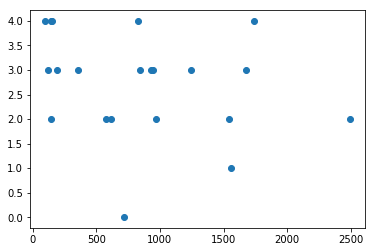

In [223]:
plt.scatter(m,n)